In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import time
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [6]:
xtrain = pd.read_csv('X_train.csv')
ytrain = pd.read_csv('y_train.csv')
xtrain = xtrain.drop('id', axis = 1)
ytrain = ytrain.drop('id', axis = 1)
xtest = pd.read_csv('X_test.csv')
xtest = xtest.drop('id', axis = 1)

np.random.seed(42)
rndperm = np.random.permutation(xtrain.shape[0])

In [3]:
feat_cols = [ 'col '+str(i) for i in range(xtrain.shape[1]) ]
df = pd.DataFrame(xtrain)
df['label'] = ytrain

In [4]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Indexed 4800 samples in 0.240s...
[t-SNE] Computed neighbors for 4800 samples in 34.626s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4800
[t-SNE] Computed conditional probabilities for sample 2000 / 4800
[t-SNE] Computed conditional probabilities for sample 3000 / 4800
[t-SNE] Computed conditional probabilities for sample 4000 / 4800
[t-SNE] Computed conditional probabilities for sample 4800 / 4800
[t-SNE] Mean sigma: 2.927770
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.270935
[t-SNE] KL divergence after 300 iterations: 3.185164
t-SNE done! Time elapsed: 46.92519950866699 seconds


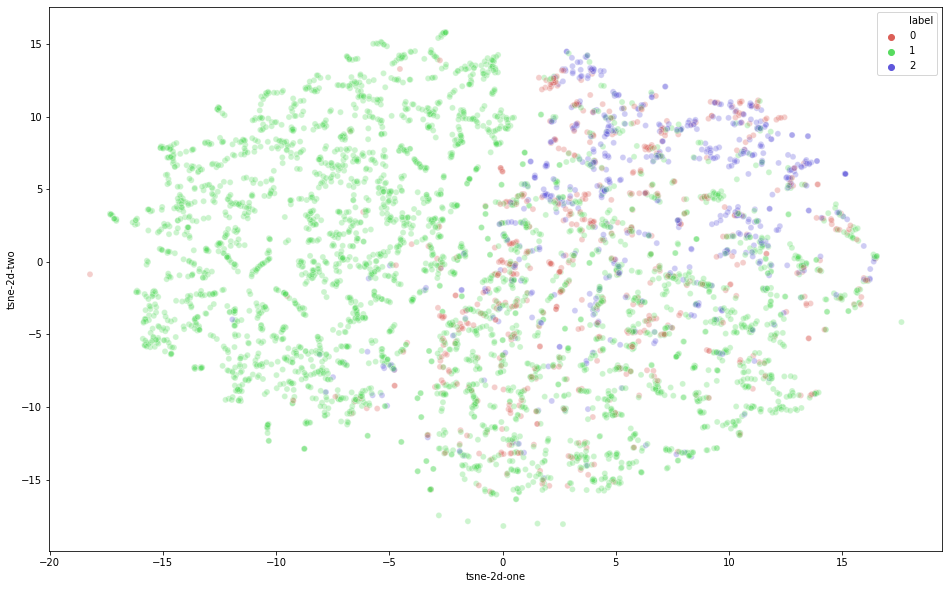

In [14]:
#2D

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=4, n_iter=300)
tsne_results = tsne.fit_transform(df)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 3),
    data=df,
    legend="full",
    alpha=0.3
)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4800 samples in 0.228s...
[t-SNE] Computed neighbors for 4800 samples in 36.262s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4800
[t-SNE] Computed conditional probabilities for sample 2000 / 4800
[t-SNE] Computed conditional probabilities for sample 3000 / 4800
[t-SNE] Computed conditional probabilities for sample 4000 / 4800
[t-SNE] Computed conditional probabilities for sample 4800 / 4800
[t-SNE] Mean sigma: 4.674531
[t-SNE] Computed conditional probabilities in 0.260s
[t-SNE] Iteration 50: error = 82.0962906, gradient norm = 0.0261038 (50 iterations in 11.017s)
[t-SNE] Iteration 100: error = 75.5854797, gradient norm = 0.0361790 (50 iterations in 9.759s)
[t-SNE] Iteration 150: error = 72.8747025, gradient norm = 0.0179545 (50 iterations in 7.342s)
[t-SNE] Iteration 200: error = 72.5988312, gradient norm = 0.0252799 (50 iterations in 6.443s)
[t-SNE] Iteration 250: error = 72.5469437, gradient norm = 0.0227

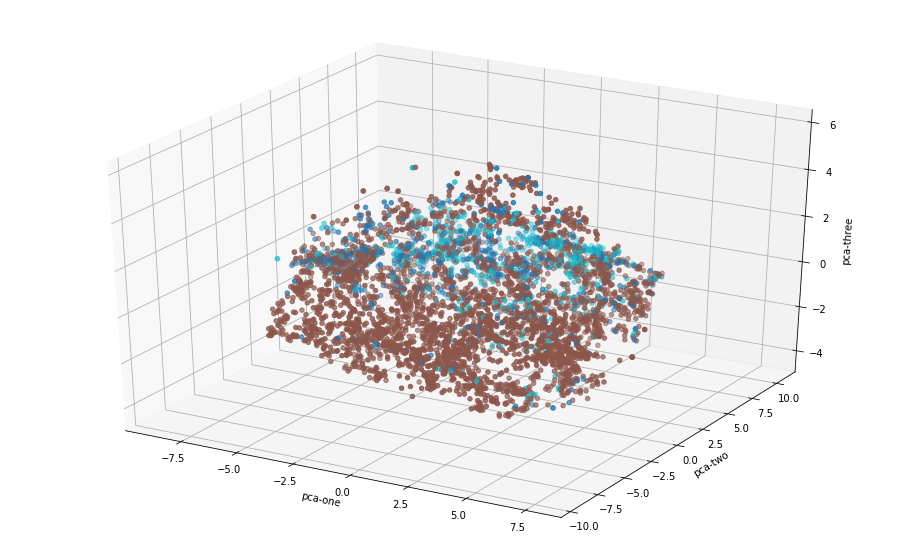

In [13]:
#3D

time_start = time.time()
tsne = TSNE(n_components=3, verbose=4, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))



df['tsne-3d-one'] = tsne_results[:,0]
df['tsne-3d-two'] = tsne_results[:,1]
df['tsne-3d-three'] = tsne_results[:,2]
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]['tsne-3d-one'], 
    ys=df.loc[rndperm,:]['tsne-3d-two'], 
    zs=df.loc[rndperm,:]['tsne-3d-three'], 
    c=df.loc[rndperm,:]["label"], 
    cmap='tab10'
)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
plt.show()